In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
# Load the CSV file

data = pd.read_csv(r'G:\내 드라이브\DATASET\Kakao\crypto_data\all_cryptos_krw_pyupbit.csv')

In [3]:
# Convert the 'date' column to datetime and format it as 'YYYY-MM-DD'
data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')

# Create the pivot table again with the formatted 'date'
pivot_df3 = data.pivot(index='date', columns='currency', values='value')

# Display the first few rows of the pivot table
pivot_df3_sum = pivot_df3.sum(axis=1)
pivot_df3_sum = pivot_df3_sum[(pivot_df3_sum.index > '2017-11-30') & (pivot_df3_sum.index < '2023-08-29')]

pivot_df3_sum


date
2017-12-01    1.201337e+12
2017-12-02    1.279226e+12
2017-12-03    1.161738e+12
2017-12-04    1.215081e+12
2017-12-05    1.173996e+12
                  ...     
2023-08-24    8.808644e+11
2023-08-25    9.696542e+11
2023-08-26    5.326709e+11
2023-08-27    5.783157e+11
2023-08-28    6.473509e+11
Length: 2097, dtype: float64

In [4]:
# Load the CSV file

data = pd.read_csv(r'G:\내 드라이브\DATASET\Kakao\crypto_data\bithumb_ohlcv_data.csv')

In [5]:
# Convert the 'date' column to datetime and format it as 'YYYY-MM-DD'
data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')

# Create the pivot table again with the formatted 'date'
pivot_df2 = data.pivot(index='date', columns='currency', values='volume')


# Display the first few rows of the pivot table
pivot_df2_sum = pivot_df2.sum(axis=1)
pivot_df2_sum

date
2017-12-01    3.054258e+08
2017-12-02    1.955302e+08
2017-12-03    1.217977e+08
2017-12-04    1.036952e+08
2017-12-05    9.038922e+07
                  ...     
2023-08-24    1.969550e+11
2023-08-25    8.991526e+11
2023-08-26    4.113107e+11
2023-08-27    7.613428e+11
2023-08-28    3.203002e+11
Length: 2097, dtype: float64

Coinone

In [6]:
# Load the CSV file

data = pd.read_csv(r'G:\내 드라이브\DATASET\Kakao\crypto_data\coinone_ohlcv_data.csv')

In [7]:
# Convert the 'date' column to datetime and format it as 'YYYY-MM-DD'
data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')

# Create the pivot table again with the formatted 'date'
pivot_df1 = data.pivot(index='date', columns='currency', values='quote_volume')


# Display the first few rows of the pivot table
pivot_df1_sum = pivot_df1.sum(axis=1)
pivot_df1_sum

date
2017-12-01    6.078798e+07
2017-12-02    3.704276e+07
2017-12-03    7.486783e+07
2017-12-04    9.596643e+07
2017-12-05    1.568589e+08
                  ...     
2023-08-24    2.379959e+10
2023-08-25    2.877786e+10
2023-08-26    1.047869e+10
2023-08-27    9.263052e+09
2023-08-28    2.034303e+10
Length: 2097, dtype: float64

In [8]:
# Load the CSV file

volume_sum = pd.concat([pivot_df3_sum, pivot_df2_sum, pivot_df1_sum], axis=1)
volume = volume_sum.sum(axis=1)
volume

date
2017-12-01    1.201703e+12
2017-12-02    1.279459e+12
2017-12-03    1.161934e+12
2017-12-04    1.215280e+12
2017-12-05    1.174243e+12
                  ...     
2023-08-24    1.101619e+12
2023-08-25    1.897585e+12
2023-08-26    9.544602e+11
2023-08-27    1.348922e+12
2023-08-28    9.879941e+11
Length: 2097, dtype: float64

In [9]:
volume.to_csv(r'G:\내 드라이브\DATASET\Kakao\crypto_data\kor_volume.csv')

In [10]:
volume_sum

,0,1,2
date,,,
2017-12-01,1.201337e+12,3.054258e+08,6.078798e+07
2017-12-02,1.279226e+12,1.955302e+08,3.704276e+07
2017-12-03,1.161738e+12,1.217977e+08,7.486783e+07
2017-12-04,1.215081e+12,1.036952e+08,9.596643e+07
2017-12-05,1.173996e+12,9.038922e+07,1.568589e+08
...,...,...,...
2023-08-24,8.808644e+11,1.969550e+11,2.379959e+10
2023-08-25,9.696542e+11,8.991526e+11,2.877786e+10
2023-08-26,5.326709e+11,4.113107e+11,1.047869e+10


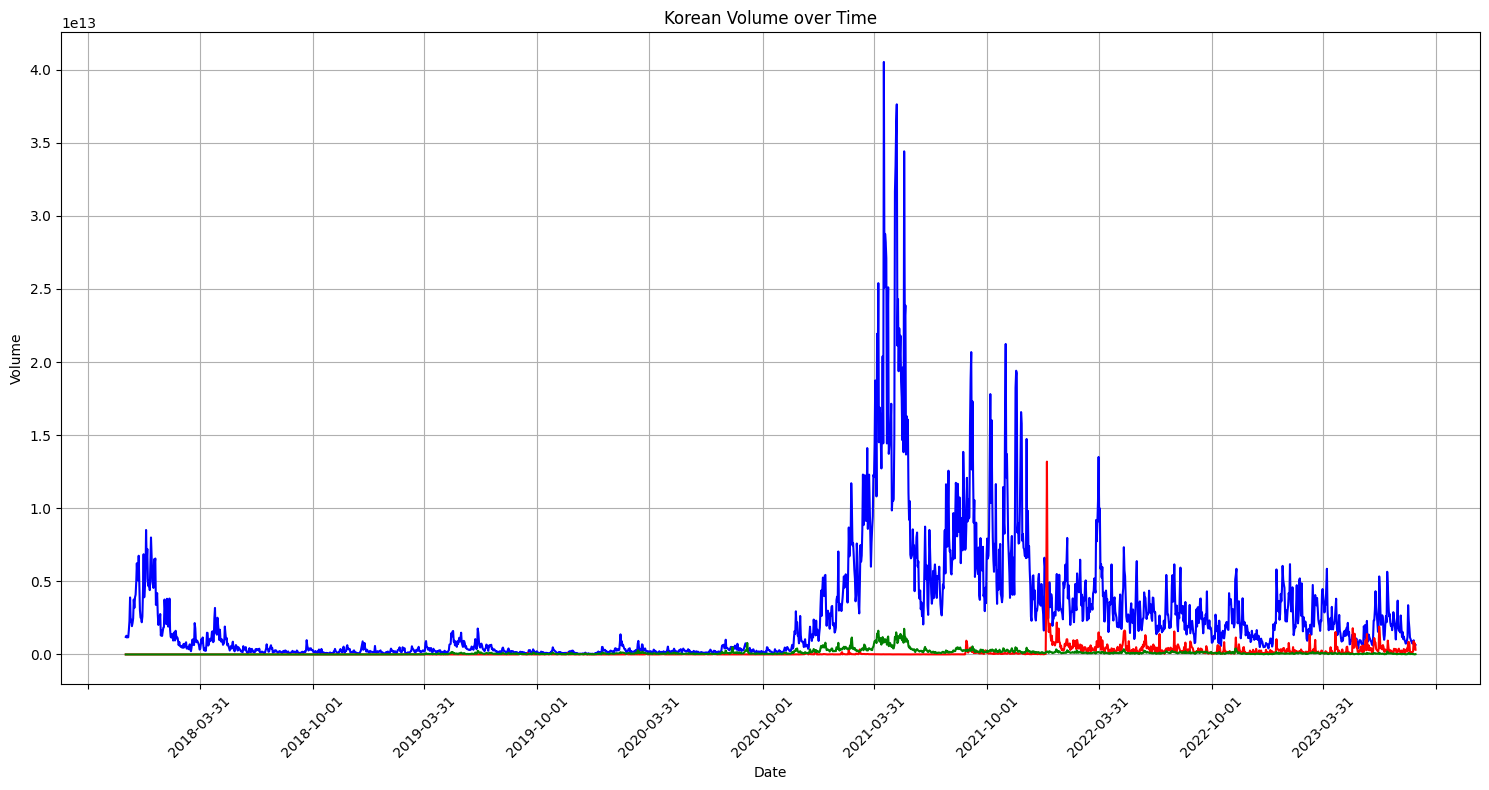

In [18]:
# 각 열에 대해 그래프를 그립니다.
plt.figure(figsize=(15, 8))
plt.plot(volume_sum.index, volume_sum[0], linestyle='-', color='b')
plt.plot(volume_sum.index, volume_sum[1],  linestyle='-', color='r')
plt.plot(volume_sum.index, volume_sum[2],  linestyle='-', color='g')
plt.title('Korean Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.tight_layout()
plt.show()